# Calculo del número $\pi$ usando la seríe de Leibniz con openMP

<center> Juan Andrés Bueno Ramírez</br>Jhon Sebastián Moreno Triana<center>

Usando la librería de ```c```, openMP, se usaron distinto número de hilos para aproximar el número $\pi$ usando ```2e9``` iteraciones. Midiendo el tiempo de uso de la CPU respecto del número de hilos es posible obtener el speedUp del programa paralelizado.

In [3]:
import numpy as np
import matplotlib.pylab as mp

## Paralelismo sin "False Sharing"
Para la primera parte del uso de la serie es usó el siguiente código:

In [ ]:
#include <stdio.h>
#include <omp.h>
#include <time.h>

#define NUM_THREADS 16
#define IT 2e9

clock_t init,end;
double total_time;

long double sums[NUM_THREADS];
long double pi = 0;
int start[NUM_THREADS];
int finish[NUM_THREADS];

void main(){
    for(int j=0; j<NUM_THREADS;j++){
        start[j]= (int) (IT/NUM_THREADS)*j;
        finish[j] = (int) (IT/NUM_THREADS)*(j+1)-1;
    }
    init = clock();
    #pragma omp parallel num_threads(NUM_THREADS)
    {
        int ID = omp_get_thread_num();

        for(int i = start[ID]; i<=finish[ID]; i++){
            sums[ID] += (i&1)? ((long double) -4/(long double) (2*i+1)): ((long double) 4/(long double) (2*i+1));
        }
    }
    end = clock();
    total_time = ((double)(end - init))/CLOCKS_PER_SEC;

    for(int j=0; j<NUM_THREADS;j++){
        pi+=sums[j];
    }
    printf("%.15Lf\n", pi);
    printf("%d , %lf \n", NUM_THREADS,total_time);
}


Obteniendo así los siguientes datos y gráficos:

In [38]:
num = np.linspace(1,16,16)
times = [[31.728843, 31.252906, 31.329296] #1
         ,[15.241374,15.228445,15.157039]  #2
         ,[10.272671,10.182516,10.258627]  #3
         ,[7.665813,8.449137,7.894132]     #4
         ,[6.379021,6.308562,6.387339]     #5
         ,[5.149860,5.057618,5.008782]     #6
         ,[4.368433,4.420176,4.446999]     #7
         ,[3.922784,3.959320,3.866879]     #8
         ,[3.360359,3.402845,3.457657]     #9
         ,[3.027021,3.128305,3.089826]     #10
         ,[2.729792,2.771821,2.913783]     #11
         ,[2.620160,2.568784,2.487094]     #12
         ,[2.331105,2.376645,2.346943]     #13
         ,[2.184369,2.121364,2.218135]     #14
         ,[2.111175,2.052031,2.072499]     #15
         ,[1.888218,1.854899,1.950670]]    #16
time = np.array([ sum(t)/len(t) for t in times])

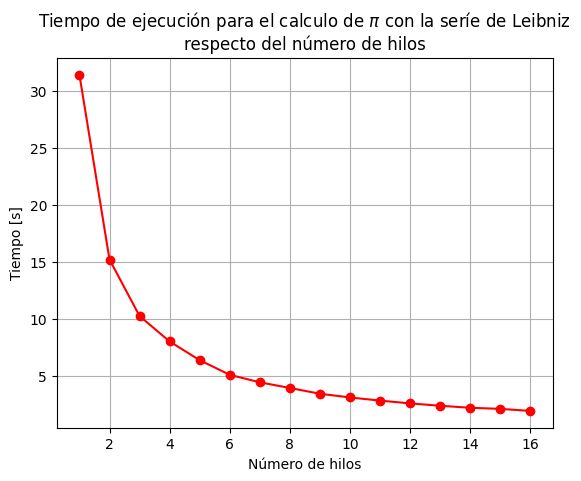

In [39]:
mp.plot(num,time, "r-")
mp.plot(num,time, "ro")
mp.title("Tiempo de ejecución para el calculo de $\\pi$ con la seríe de Leibniz\nrespecto del número de hilos")
mp.xlabel("Número de hilos")
mp.ylabel("Tiempo [s]")
mp.grid(True)

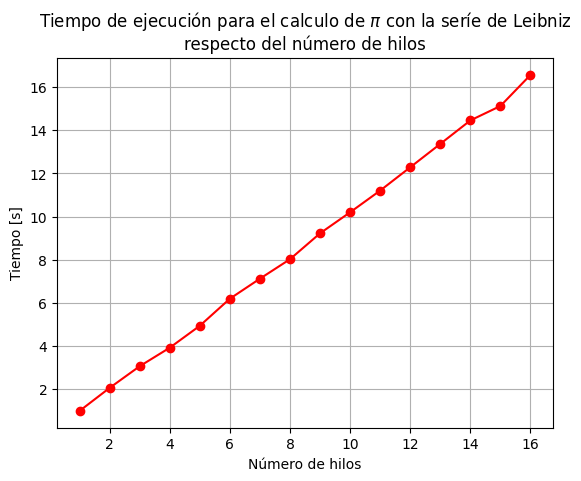

In [40]:
mp.plot(num,time[0]/time, "r-")
mp.plot(num,time[0]/time, "ro")
mp.title("Tiempo de ejecución para el calculo de $\\pi$ con la seríe de Leibniz\nrespecto del número de hilos")
mp.xlabel("Número de hilos")
mp.ylabel("Tiempo [s]")
mp.grid(True)